I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
penguindf = pd.read_csv('penguins_lter.csv')
penguindf

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [3]:
penguindf.isnull().sum(axis=0)

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [4]:
penguindf.drop('Comments', inplace=True, axis=1)

In [5]:
penguindf = penguindf.dropna(subset=['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Sex'])

In [6]:
penguindf.fillna(value=penguindf['Delta 15 N (o/oo)'].mean(), inplace=True)
penguindf.fillna(value=penguindf['Delta 13 C (o/oo)'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [7]:
penguindf.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,63.805389,43.994311,17.160479,201.014970,4209.056886,8.737794,-24.859898
std,40.246924,5.460521,1.967909,14.022175,804.836129,0.545063,5.329366
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,30.250000,39.500000,15.600000,190.000000,3550.000000,8.309078,-26.300325
50%,58.500000,44.500000,17.300000,197.000000,4050.000000,8.681410,-25.806100
75%,95.750000,48.575000,18.700000,213.000000,4793.750000,9.151967,-25.010613
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,8.737794


In [8]:
penguindf.shape

(334, 16)

In [9]:
penguindf.dtypes

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object

In [10]:
penguindf[['Species','Island','Sex']] = penguindf[['Species','Island','Sex']].astype('category')
print(penguindf.dtypes)

studyName                object
Sample Number             int64
Species                category
Region                   object
Island                 category
Stage                    object
Individual ID            object
Clutch Completion        object
Date Egg                 object
Culmen Length (mm)      float64
Culmen Depth (mm)       float64
Flipper Length (mm)     float64
Body Mass (g)           float64
Sex                    category
Delta 15 N (o/oo)       float64
Delta 13 C (o/oo)       float64
dtype: object


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
normalizeddf = penguindf.copy()

column = ['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']
normalizeddf[column] = (normalizeddf[column] - normalizeddf[column].min()) / (normalizeddf[column].max() - normalizeddf[column].min())    
  
display(normalizeddf)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,0.254545,0.666667,0.152542,0.291667,MALE,0.461965,1.000000
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,0.269091,0.511905,0.237288,0.305556,FEMALE,0.550450,0.064995
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,0.298182,0.583333,0.389831,0.152778,FEMALE,0.307537,0.047139
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,0.167273,0.738095,0.355932,0.208333,FEMALE,0.473964,0.047384
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,0.261818,0.892857,0.305085,0.263889,MALE,0.431532,0.048117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,PAL0910,119,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,No,12/1/09,0.549091,0.071429,0.711864,0.618056,FEMALE,0.150273,0.022742
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,0.534545,0.142857,0.728814,0.597222,FEMALE,0.325630,0.024617
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,0.665455,0.309524,0.847458,0.847222,MALE,0.279730,0.027334
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,0.476364,0.202381,0.677966,0.694444,FEMALE,0.254993,0.025138


In [12]:
normalizeddf[['Region','Clutch Completion','Stage']] = normalizeddf[['Region','Clutch Completion','Stage']].astype('category')
X = normalizeddf[['Species', 'Region', 'Island', 'Stage','Sex',
       'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]

In [13]:
X['Species'] = X['Species'].cat.codes
X['Region'] = X['Region'].cat.codes
X['Island'] = X['Island'].cat.codes
X['Stage'] = X['Stage'].cat.codes
X['Sex'] = X['Sex'].cat.codes-1
X['Clutch Completion'] = X['Clutch Completion'].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [14]:
ind = np.random.rand(len(X)) < 0.8

train = X[ind]

test = X[~ind]


In [15]:
X_train = train.iloc[:,[0,1,2,3,5,6,7,8,9,10,11]]
Y_train = train.iloc[:,4]

X_test = test.iloc[:,[0,1,2,3,5,6,7,8,9,10,11]]
Y_test = test.iloc[:,4]

In [16]:
Y_train.shape

(272,)

In [17]:
Y_test.shape

(62,)

In [18]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy().reshape(272,1)
Y_test = Y_test.to_numpy().reshape(62,1)

In [19]:
class Perceptron:
  
  def __init__(self, x, y):
    self.input = x
    self.label = y
    self.b = np.random.rand(x.shape[1], y.shape[1])

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  
  def forwardpropogation(self):
    self.y1 = self.sigmoid(self.input@self.b)
    return self.y1

  def backwardpropogation(self):
    gradient = self.input.T @ (0.001 * (self.label - self.y1)*self.sigmoid(self.y1))

    self.b += gradient

  def predict(self, X):
        ypred = self.forwardpropogation()
        pred_arr = []
        pred_arr = [1 if i > 0.5 else 0 for i in ypred]
        return np.array(pred_arr)

  def score(self, X, Y):
        predictions = self.predict(X)
        score =1-np.mean(Y != predictions)

        # score = 1 - error_rate(Y,predictions)
        return score


score 0.4666666666666667
Final Mean Squared Error for Train Data set: [0.12619486]


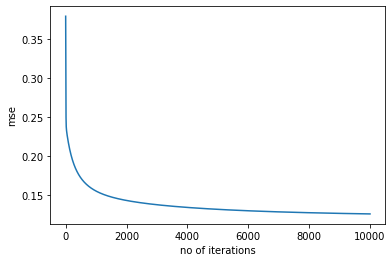

In [ ]:
sample = Perceptron(X_train,Y_train)
# score = sample.score(X_test, Y_test)
training_iterations = 10000
history = []

# print("score", score)

def mse(y1, y):
  sum = 0.0
  for predict, label in zip(y1, y):
    sum += (predict-label)**2
  return sum/len(y1)
  

for i in range(training_iterations):
  sample.forwardpropogation()
  sample.backwardpropogation()
  y1 = sample.forwardpropogation()
  history.append(mse(y1, sample.label))

y1 = sample.forwardpropogation()

print(f'Final Mean Squared Error for Train Data set: {mse(y1, sample.label)}')

plt.plot(history)
plt.ylabel('mse')
plt.xlabel('no of iterations')
plt.show()


The achieved accuracy by implementing perceptron is less than the accuracy achieved by implementing Logistic Regression in Assignment 2

score 0.5967741935483871
Final Mean Squared Error for Train Data set: [0.12306279]


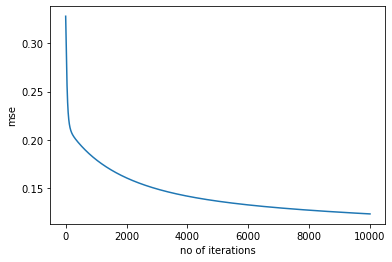

In [20]:
sample = Perceptron(X_test,Y_test)
score = sample.score(X_test, Y_test)
training_iterations = 10000
history = []

print("score", score)

def mse(y1, y):
  sum = 0.0
  for predict, label in zip(y1, y):
    sum += (predict-label)**2
  return sum/len(y1)
  

for i in range(training_iterations):
  sample.forwardpropogation()
  sample.backwardpropogation()
  y1 = sample.forwardpropogation()
  history.append(mse(y1, sample.label))

y1 = sample.forwardpropogation()

print(f'Final Mean Squared Error for Train Data set: {mse(y1, sample.label)}')

plt.plot(history)
plt.ylabel('mse')
plt.xlabel('no of iterations')
plt.show()
